# Imputacion Multiple (MICE)

## Preparacion del entorno

### Librerias

In [16]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica
# import session_info
# sklearn contiene los modelos a utilizar
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic

### Configuracion de las Graficas

In [17]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

### Importar funciones personalizadas

In [18]:
%run '../utils2.ipynb'

## Cargar datos preparados

In [19]:
%run tratamiento_v_categoricas.ipynb

12.25 %


In [20]:
nhanes_transformed_df

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,1.0,43.04,300.0,0.0,0.0,0.0,1.0,165.0,0.0,66.0
93706.0,NaN,NaN,240.0,0.0,0.0,0.0,1.0,145.0,0.0,18.0
93709.0,0.0,NaN,600.0,0.0,1.0,0.0,0.0,200.0,0.0,75.0
93711.0,NaN,163.76,420.0,0.0,0.0,1.0,1.0,142.0,0.0,56.0
93712.0,2.0,207.67,120.0,1.0,1.0,1.0,1.0,135.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,1.0,NaN,120.0,0.0,0.0,1.0,0.0,118.0,0.0,31.0
102949.0,0.0,NaN,60.0,1.0,1.0,0.0,0.0,180.0,0.0,33.0
102953.0,1.0,NaN,360.0,1.0,1.0,0.0,0.0,218.0,0.0,42.0


## Imputacion MICE

### Copia de los datos

In [21]:
nhanes_mice_df = nhanes_transformed_df.copy(deep=True)

### Imputador con MICE

In [22]:
# crea copias del dataframe, las analiza y devuelve un solo conjunto de datos
# MICE en python es conocido como Iterative Imputer

mice_imputer = sklearn.impute.IterativeImputer(
    estimator = BayesianRidge(), # metodo bayesiano para estimar los missing
    initial_strategy='mean',
    imputation_order='ascending'
)

mice_imputer

IterativeImputer(estimator=BayesianRidge())

### Ajuste, transformacion y sustitucion de los datos imputados

In [23]:

nhanes_mice_df.iloc[:, :] = mice_imputer.fit_transform(nhanes_transformed_df).round()
nhanes_mice_df

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,1.0,43.0,300.0,0.0,0.0,0.0,1.0,165.0,0.0,66.0
93706.0,1.0,86.0,240.0,0.0,0.0,0.0,1.0,145.0,0.0,18.0
93709.0,0.0,119.0,600.0,0.0,1.0,0.0,0.0,200.0,0.0,75.0
93711.0,1.0,164.0,420.0,0.0,0.0,1.0,1.0,142.0,0.0,56.0
93712.0,2.0,208.0,120.0,1.0,1.0,1.0,1.0,135.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,1.0,84.0,120.0,0.0,0.0,1.0,0.0,118.0,0.0,31.0
102949.0,0.0,128.0,60.0,1.0,1.0,0.0,0.0,180.0,0.0,33.0
102953.0,1.0,109.0,360.0,1.0,1.0,0.0,0.0,218.0,0.0,42.0


### Matriz de sombra del dataframe

In [24]:
nhanes_mice_df = (
    pd.concat(
        [
            nhanes_mice_df,
            nhanes_df.missing.create_shadow_matrix2(
                True,
                False,
                only_missing=False,
                suffix='_imp',
            )
        ],
        axis=1
    )
)

nhanes_mice_df

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age,cigarettes_imp,sugar_gm_imp,minutes_sedentary_imp,vigorous_work_imp,moderate_work_imp,vigorous_recreational_imp,moderate_recreational_imp,weight_imp,diabetes_imp,age_imp
SEQN,,,,,,,,,,,,,,,,,,,,
93705.0,1.0,43.0,300.0,0.0,0.0,0.0,1.0,165.0,0.0,66.0,False,False,False,False,False,False,False,False,False,False
93706.0,1.0,86.0,240.0,0.0,0.0,0.0,1.0,145.0,0.0,18.0,True,True,False,False,False,False,False,False,False,False
93709.0,0.0,119.0,600.0,0.0,1.0,0.0,0.0,200.0,0.0,75.0,False,True,False,False,False,False,False,False,False,False
93711.0,1.0,164.0,420.0,0.0,0.0,1.0,1.0,142.0,0.0,56.0,True,False,False,False,False,False,False,False,False,False
93712.0,2.0,208.0,120.0,1.0,1.0,1.0,1.0,135.0,0.0,18.0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102948.0,1.0,84.0,120.0,0.0,0.0,1.0,0.0,118.0,0.0,31.0,False,True,False,False,False,False,False,False,False,False
102949.0,0.0,128.0,60.0,1.0,1.0,0.0,0.0,180.0,0.0,33.0,False,True,False,False,False,False,False,False,False,False
102953.0,1.0,109.0,360.0,1.0,1.0,0.0,0.0,218.0,0.0,42.0,False,True,False,False,False,False,False,False,False,False


### Visualizacion de los datos imputados mediante un scatterplot

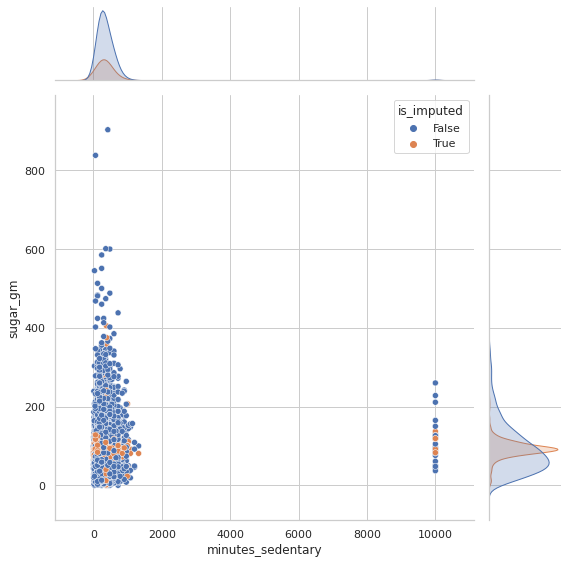

In [26]:
nhanes_mice_df.missing.scatter_imputation_plot(
    x='minutes_sedentary',
    y='sugar_gm',
    show_marginal = True,   # muestra la distribucion a los costado
    height = 8             # tamano del grafico
)

In [27]:
print('''A pesar que los datos imputados estan mejor distribuidos, siguen agrupandose en una 
zona lo que sesga la distribucion y rompe con la estructura de los datos. Esto puede deberse
a que el metodo del imputador no es el adecuado describir el comportamiento de los datos''')

A pesar que los datos imputados estan mejor distribuidos, siguen agrupandose en una 
zona lo que sesga la distribucion y rompe con la estructura de los datos. Esto puede deberse
a que el metodo del imputador no es el adecuado describir el comportamiento de los datos
